# Logistic Regression

In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.

In [67]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

Text(0,0.5,'Exam 2 Score')

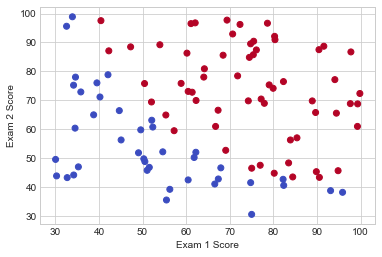

In [68]:
data = pd.read_csv('ex2data1.txt',header=None)
data.columns = ['Exam 1 Score','Exam 2 Score','Admitted']
plt.scatter(data['Exam 1 Score'], data['Exam 2 Score'], c=data['Admitted'], cmap=plt.cm.coolwarm)
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')

In [69]:
lm = LogisticRegression()
x = data[['Exam 1 Score','Exam 2 Score']]
y = data['Admitted']
lm.fit(x, y)
print("intercept : ",lm.intercept_)
print("coeffients: ",lm.coef_)

intercept :  [-3.89977794]
coeffients:  [[ 0.03844482  0.03101855]]


[25, 105, 25, 105]

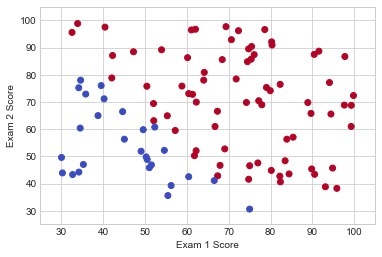

In [70]:
y_test = lm.predict(x)
plt.scatter(data['Exam 1 Score'], data['Exam 2 Score'], c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.axis([25, 105, 25, 105])

# Regularized logistic regression

In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.

Text(0,0.5,'Microchip Test 2')

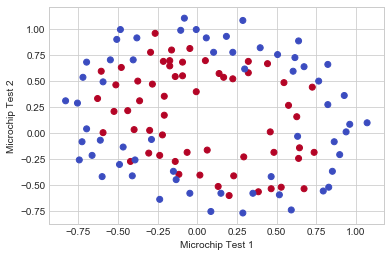

In [71]:
data = pd.read_csv('ex2data2.txt',header=None)
data.columns = ['Microchip Test 1','Microchip Test 2','QA']
plt.scatter(data['Microchip Test 1'], data['Microchip Test 2'], c=data['QA'], cmap=plt.cm.coolwarm)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

In [72]:
data['x1^2'] = data['Microchip Test 1'].apply(lambda x: x * x)
data['x2^2'] = data['Microchip Test 2'].apply(lambda x: x * x)
data['x1x2'] = data['Microchip Test 1'] * data['Microchip Test 2']
data.head()

,Microchip Test 1,Microchip Test 2,QA,x1^2,x2^2,x1x2
0,0.051267,0.69956,1,0.002628,0.489384,0.035864
1,-0.092742,0.68494,1,0.008601,0.469143,-0.063523
2,-0.213710,0.69225,1,0.045672,0.479210,-0.147941
3,-0.375000,0.50219,1,0.140625,0.252195,-0.188321
4,-0.513250,0.46564,1,0.263426,0.216821,-0.238990


In [73]:
lm = LogisticRegression()
x = data[['Microchip Test 1','Microchip Test 2','x1^2','x2^2','x1x2']]
y = data['QA']
x = pd.DataFrame(x)
lm.fit(x, y)
print("intercept : ",lm.intercept_)
print("coeffients: ",lm.coef_)

intercept :  [ 1.08400066]
coeffients:  [[ 0.33447193  0.65901889 -2.63636943 -2.24576188 -0.95455457]]


[-0.9, 1.15, -0.9, 1.15]

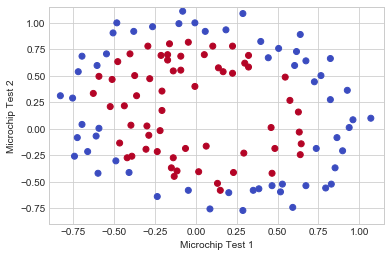

In [74]:
y_test = lm.predict(x)
plt.scatter(data['Microchip Test 1'], data['Microchip Test 2'], c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.axis([-0.9, 1.15, -0.9, 1.15])